# 84_MNIST data using PCA and kNN - 학습 적용

In [28]:
import pandas as pd
df_train  = pd.read_csv('./Datasets/MNIST/mnist_train.csv')
df_test = pd.read_csv('./Datasets/MNIST/mnist_test.csv')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [29]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
import numpy as np 

X_train = np.array(df_train.iloc[:,1:])
y_train = np.array(df_train['label'])     # label

X_test = np.array(df_test.iloc[:,1:])
y_test = np.array(df_test['label'])

In [31]:
import random
import matplotlib.pyplot as plt

In [32]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
accuracy_score(y_test, pred)
                # 테스트 대상
                        # 예측 비교 대상

0.9688

In [34]:
# kNN은 차원의 저주가 있다 (모든 근접 이웃에 다 접근해야 하기 때문)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('pca', PCA()),
    ('clf',KNeighborsClassifier()),
])

param = {
    'pca__n_components' : [2, 5, 10],
    'clf__n_neighbors' : [5, 10, 15]
}

In [36]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 13)
                    # 5등분 하라고 지시
grid = GridSearchCV(pipe, param, cv = kf, n_jobs=-1, verbose=1)
                                                    # verbose : 진행상황 출력
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [37]:
grid.best_score_

0.9310666666666666

In [38]:
grid.best_params_

{'clf__n_neighbors': 10, 'pca__n_components': 10}

In [39]:
# accuracy
pred = grid.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

# 차원을 축소시켜 나온 결과는 0.7초가 나왔다.
# 물론 정확도는 96퍼센트에서 92퍼센트로 낮아짐.

0.9289

In [40]:
def results(y_pred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))

results(grid.predict(X_train), y_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.94      0.90      0.92      6131
           4       0.94      0.93      0.93      5842
           5       0.93      0.94      0.93      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.92      0.91      0.91      5851
           9       0.90      0.91      0.90      5949

    accuracy                           0.95     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.95      0.94     60000



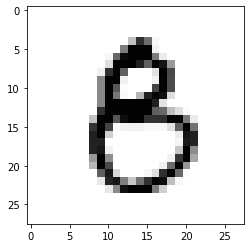

Answer :  [5]
Real Answer :  8


In [41]:
n  =  800
plt.imshow(X_test[n].reshape(28,28), cmap='Greys')
plt.show()

print('Answer : ', grid.best_estimator_.predict(X_test[n].reshape(1, 784)))
print('Real Answer : ', y_test[n])

In [42]:
# 틀린 데이터 찾기
preds = grid.best_estimator_.predict(X_test)
preds
    # 예측한 결과

array([7, 2, 1, ..., 4, 5, 6])

In [43]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [45]:
wrong_results = X_test[y_test != preds]
                        # 예측 값과 참값이 서로 다른 값을 찾아서 반환
# wrong_results
print(wrong_results.shape[0])
samples = random.choices(population=range(0,wrong_results.shape[0]), k=16)


711


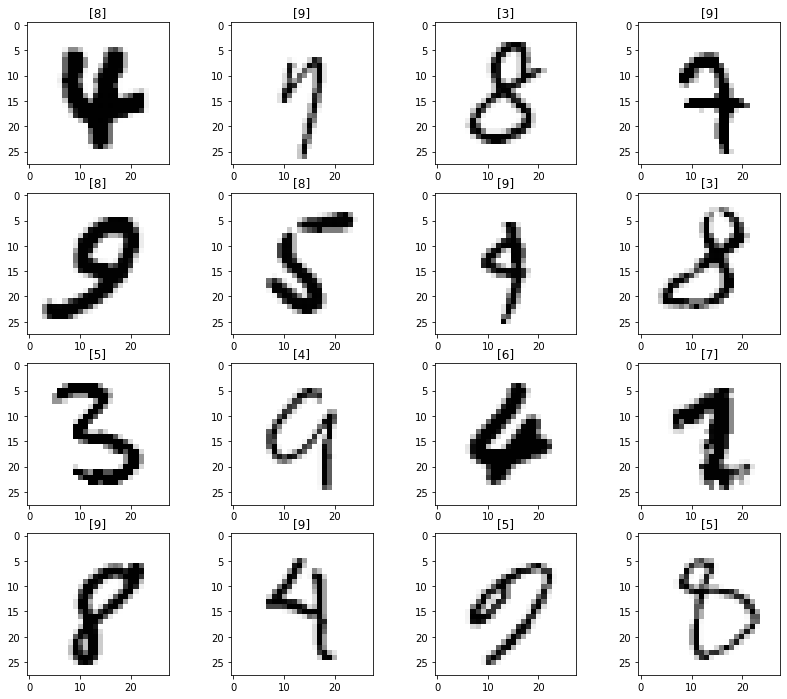

In [49]:
plt.figure(figsize = (14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4,4,idx + 1)
    plt.imshow(wrong_results[n].reshape(28,28), cmap='Greys')
    pred_digit = grid.best_estimator_.predict(wrong_results[n].reshape(1,784))
    plt.title(str(pred_digit))

plt.show()